In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt


In [31]:
# ---------------------------------------------------------------------
# 1.  Load dataset 
# ---------------------------------------------------------------------
merged_df = pd.read_csv("../data/raw/combined_kaggle_538_elo.csv")

In [32]:
# ---------------------------------------------------------------------
# 2.  Inspect missing values 
# ---------------------------------------------------------------------

# Count missing values and percentages per column
missing_per_column = merged_df.isnull().sum()
missing_percentage = (missing_per_column / len(merged_df)) * 100
missing_info = pd.DataFrame({
    'missing_values': missing_per_column,
    'missing_percentage': missing_percentage
})
print("Missing values per column and missing percentage:\n", missing_info)


Missing values per column and missing percentage:
                    missing_values  missing_percentage
game_id                         0            0.000000
TEAM_ABBREVIATION               0            0.000000
pts_home                        0            0.000000
season_id                       0            0.000000
game_date                       0            0.000000
wl_home                         0            0.000000
fgm_home                       16            0.019819
fga_home                    20522           25.419908
fg_pct_home                 20582           25.494228
fg3m_home                   17714           21.941733
fg3a_home                   24804           30.723877
fg3_pct_home                25246           31.271367
ftm_home                       18            0.022296
fta_home                     4436            5.494723
ft_pct_home                  4438            5.497201
oreb_home                   25016           30.986474
dreb_home                   250


Dates with missing values:
 0        1946-11-02
1        1946-11-02
2        1946-11-02
3        1946-11-02
4        1946-11-05
            ...    
37389    1993-11-20
37836    1994-01-12
37837    1994-01-12
45558    1998-03-04
45559    1998-03-04
Name: date_game, Length: 25718, dtype: object


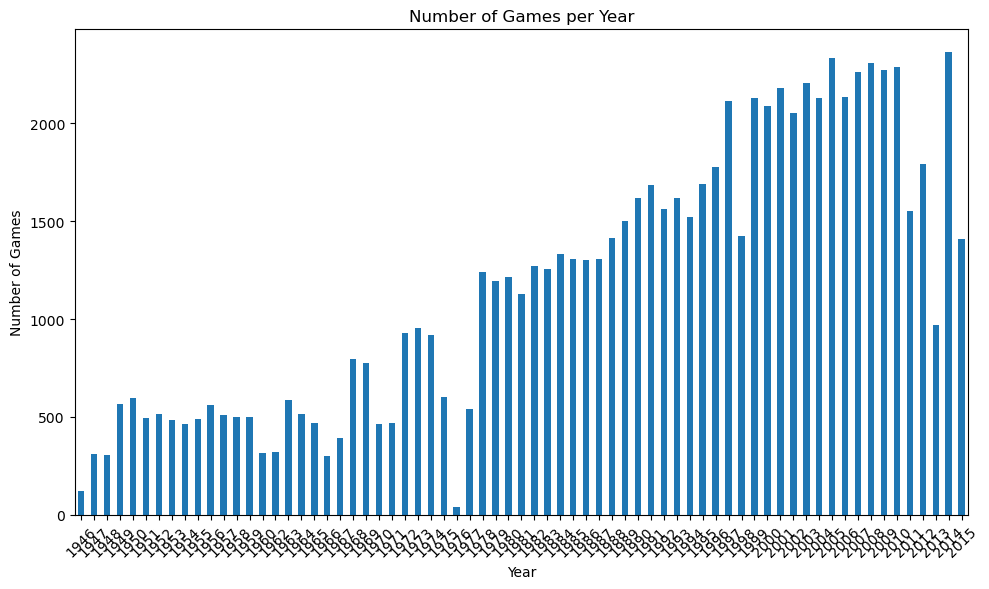

In [ ]:

# Find the date when data is missing
missing_dates = merged_df[merged_df.isnull().any(axis=1)]['date_game']
print("\nDates with missing values:\n", missing_dates)

# Create a histogram of missing values based on the game date
plt.figure(figsize=(10, 6))
merged_df['date_game'] = pd.to_datetime(merged_df['date_game'])
merged_df['date_game'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Games per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()

In [42]:
merged_df['game_date'].max()

'2015-06-16 00:00:00'

In [ ]:
# ---------------------------------------------------------------------
# 3.  Remove rows with missing values 
# ---------------------------------------------------------------------

# Remove rows with any missing values
cleaned_df = merged_df.dropna()
len(cleaned_df)
cleaned_df['game_date'].min()


'1980-05-07 00:00:00'

In [50]:
# ---------------------------------------------------------------------
# 4.  Compare old and new datasets
# ---------------------------------------------------------------------

print("The number of rows in the original dataset is ", len(merged_df))
print("The earliest game in the original dataset is ", merged_df['game_date'].min() )

print("The number of rows in the cleaned dataset is ", len(cleaned_df) )
print("The earliest game in the cleaned dataset is ", cleaned_df['game_date'].min() )

The number of rows in the original dataset is  80732
The earliest game in the original dataset is  1946-11-02 00:00:00
The number of rows in the cleaned dataset is  55014
The earliest game in the cleaned dataset is  1980-05-07 00:00:00


In [29]:
# ---------------------------------------------------------------------
# 5.  Inspect data types
# ---------------------------------------------------------------------

# Inspect data types of each column
data_types = merged_df.dtypes
print("\nData types of each column:\n", data_types)


Data types of each column:
 game_id                int64
TEAM_ABBREVIATION     object
pts_home_x           float64
season_id              int64
game_date             object
wl_home               object
fgm_home             float64
fga_home             float64
fg_pct_home          float64
fg3m_home            float64
fg3a_home            float64
fg3_pct_home         float64
ftm_home             float64
fta_home             float64
ft_pct_home          float64
oreb_home            float64
dreb_home            float64
reb_home             float64
ast_home             float64
stl_home             float64
blk_home             float64
tov_home             float64
pf_home              float64
pts_home_y           float64
plus_minus_home        int64
team_id_away           int64
team_name_away        object
matchup_away          object
fgm_away             float64
fga_away             float64
fg_pct_away          float64
fg3m_away            float64
fg3a_away            float64
fg3_pct_away  

In [47]:
# Save the cleaned DataFrame to a new CSV file
output_path = Path("../data/processed/cleaned_combined_kaggle_538_elo.csv")
cleaned_df.to_csv(output_path, index=False)